In [2]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

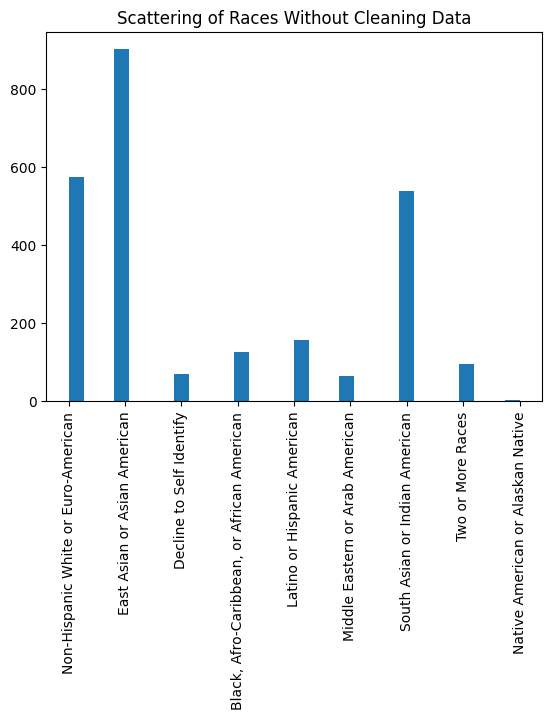

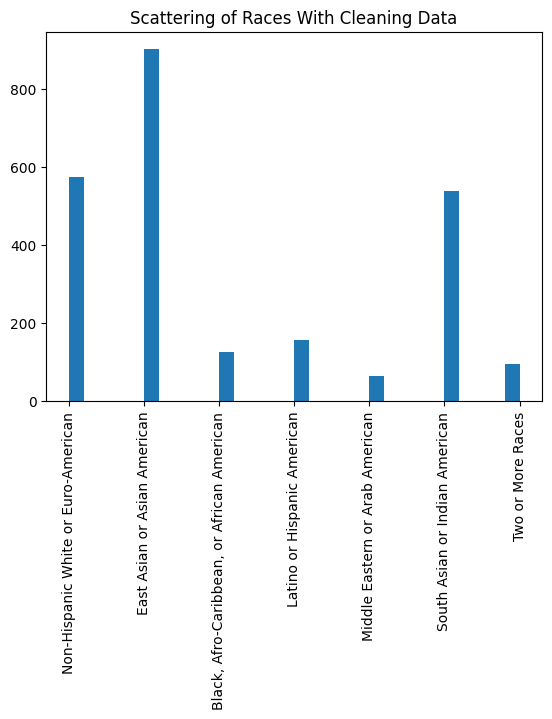

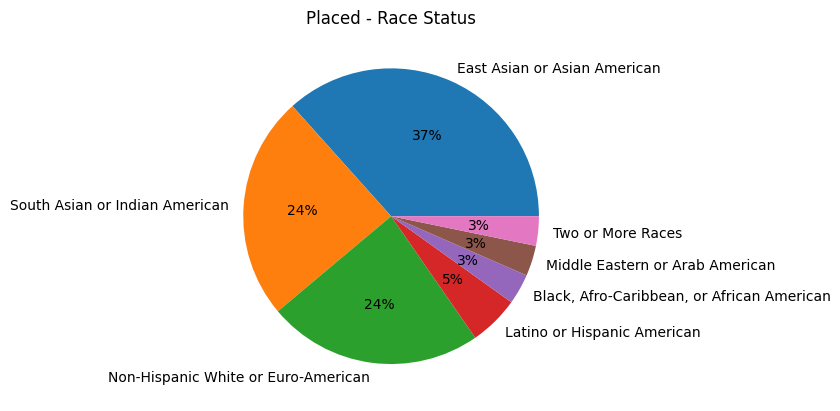

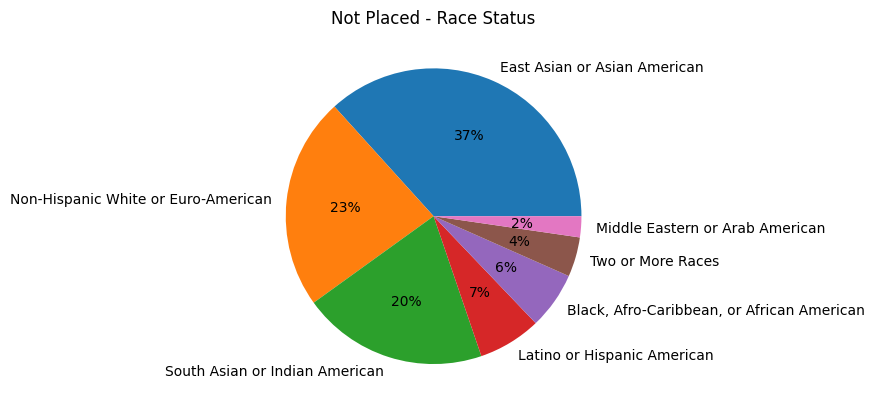

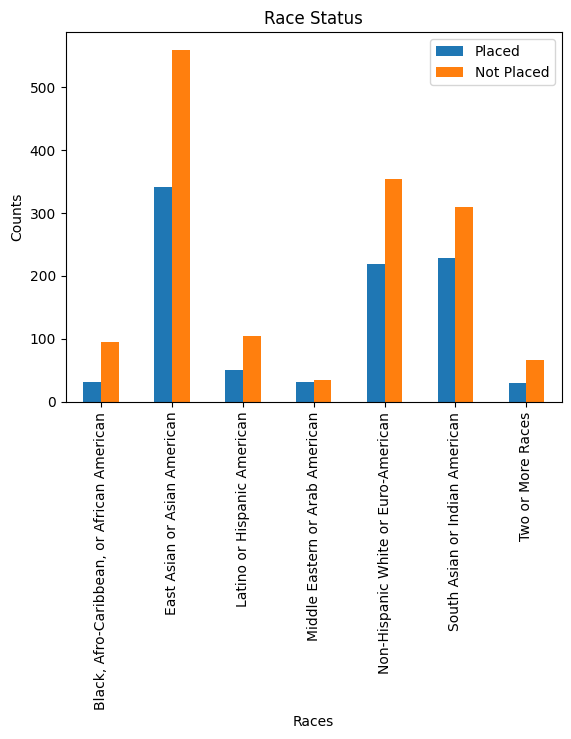

In [6]:
"""
Load data into DataFrame, clean and analyze race data for placed 
and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'race' column.
     - Plot histogram to visualize distribution of races without cleaning the data using matplotlib:
       - Title: 'Scattering of Races Without Cleaning Data'
   - Replace specific race categories with NaN in 'race' column and drop corresponding rows with missing values.
     Plot histogram again to visualize distribution of races after cleaning the data using matplotlib:
       - Title: 'Scattering of Races With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'race' data for placed and not placed candidates.
6. Create pie charts to visualize distribution of race for placed and not placed candidates using matplotlib:
   - Title: 'Placed - Race Status' and 'Not Placed - Race Status'
7. Create DataFrame 'combinedDataFrame' and plot bar chart to compare counts of race for both groups using matplotlib:
   - X-axis: 'Races'
   - Y-axis: 'Counts'
   - Title: 'Race Status'

Note: Requires matplotlib, numpy, and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "race"
dataFrame = dataFrame.dropna(subset=["race"])
plt.title('Scattering of Races Without Cleaning Data')
plt.hist(dataFrame["race"], bins=30)
plt.xticks(rotation=90)
plt.show()

# Replace specific race categories with NaN in "race" column and drop corresponding rows
dataFrame["race"] = dataFrame["race"].replace("Native American or Alaskan Native", np.nan)
dataFrame["race"] = dataFrame["race"].replace("Decline to Self Identify", np.nan)
dataFrame = dataFrame.dropna(subset=["race"])
plt.title('Scattering of Races With Cleaning Data')
plt.hist(dataFrame["race"], bins=30)
plt.xticks(rotation=90)
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract race data for placed and not placed groups
racePlaced = dataPlaced["race"]
raceNotPlaced = dataNotPlaced["race"]

# Create pie charts to visualize distribution of race for placed candidates
racePlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Race Status')
plt.show()

# Create pie charts to visualize distribution of race for not placed candidates
raceNotPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Race Status')
plt.ylabel('')
plt.show()

# Count occurrences of each race
racePlaced = racePlaced.value_counts()
raceNotPlaced = raceNotPlaced.value_counts()

# Create a combined DataFrame for bar chart visualization
combinedDataFrame = pd.DataFrame({
    'Placed': racePlaced,
    'Not Placed': raceNotPlaced
})

# Plot bar chart showing counts of race for both groups
combinedDataFrame.plot(kind='bar')
plt.xlabel('Races')
plt.ylabel('Counts')
plt.title('Race Status')
plt.show()
